# Running Machine Learning models

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import numpy as np
import datetime
import tensorflow as tf
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Daily_News_df = pd.read_csv("Daily_Coinwise_Senti_score(2016to2021).csv")
Daily_News_df

,Unnamed: 0,Dt_Rev_time,Coin_Symbol,Polarity
0,0,2016-07-11,BUSD,0.331579
1,1,2016-07-11,DOGE,0.331579
2,2,2016-07-11,XLM,0.331579
3,3,2016-07-23,BUSD,0.285714
4,4,2016-07-23,DOGE,0.285714
...,...,...,...,...
12899,12899,2021-07-06,ETH,0.064185
12900,12900,2021-07-06,LTC,0.136327
12901,12901,2021-07-06,USDT,0.081108
12902,12902,2021-07-06,XLM,0.095572


In [3]:
# selecting rows based on condition
BTC_df = Daily_News_df[(Daily_News_df['Coin_Symbol'] == 'BTC')]
BTC_df

,Unnamed: 0,Dt_Rev_time,Coin_Symbol,Polarity
39,39,2017-02-13,BTC,0.076587
43,43,2017-02-20,BTC,0.037188
62,62,2017-06-15,BTC,0.307652
74,74,2017-06-29,BTC,0.457143
78,78,2017-07-04,BTC,0.299518
...,...,...,...,...
12858,12858,2021-07-02,BTC,0.091679
12867,12867,2021-07-03,BTC,0.108143
12877,12877,2021-07-04,BTC,0.094794
12886,12886,2021-07-05,BTC,0.078018


In [4]:
BTC_df.drop('Unnamed: 0', axis=1)

,Dt_Rev_time,Coin_Symbol,Polarity
39,2017-02-13,BTC,0.076587
43,2017-02-20,BTC,0.037188
62,2017-06-15,BTC,0.307652
74,2017-06-29,BTC,0.457143
78,2017-07-04,BTC,0.299518
...,...,...,...
12858,2021-07-02,BTC,0.091679
12867,2021-07-03,BTC,0.108143
12877,2021-07-04,BTC,0.094794
12886,2021-07-05,BTC,0.078018


In [5]:
# import bitcoin 5 year data
Bitcoin_df = pd.read_csv("C:/UC_Berkeley/Analysis_Projects_Class_Folder/Module20_Final_Project/Cryptocurrency-Analysis/Data/bitcoin(fiveyears).csv")
Bitcoin_df

,Unnamed: 0,Name,Date,High,Low,Open,Close,Volume,Marketcap
0,1164,Bitcoin,2016-07-06 23:59:59,681.898010,670.418030,670.418030,677.330994,1.349610e+08,1.066146e+10
1,1165,Bitcoin,2016-07-07 23:59:59,682.432007,611.833984,678.090027,640.562012,2.580910e+08,1.008488e+10
2,1166,Bitcoin,2016-07-08 23:59:59,666.706970,636.466980,640.687988,666.523010,1.419700e+08,1.049604e+10
3,1167,Bitcoin,2016-07-09 23:59:59,666.383972,633.398987,666.383972,650.960022,1.805360e+08,1.025298e+10
4,1168,Bitcoin,2016-07-10 23:59:59,652.294006,641.263977,650.598999,649.359985,1.025320e+08,1.022900e+10
...,...,...,...,...,...,...,...,...,...
1821,2985,Bitcoin,2021-07-01 23:59:59,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10,6.293393e+11
1822,2986,Bitcoin,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
1823,2987,Bitcoin,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
1824,2988,Bitcoin,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11


In [6]:
Bitcoin_df.drop('Unnamed: 0', axis=1)

,Name,Date,High,Low,Open,Close,Volume,Marketcap
0,Bitcoin,2016-07-06 23:59:59,681.898010,670.418030,670.418030,677.330994,1.349610e+08,1.066146e+10
1,Bitcoin,2016-07-07 23:59:59,682.432007,611.833984,678.090027,640.562012,2.580910e+08,1.008488e+10
2,Bitcoin,2016-07-08 23:59:59,666.706970,636.466980,640.687988,666.523010,1.419700e+08,1.049604e+10
3,Bitcoin,2016-07-09 23:59:59,666.383972,633.398987,666.383972,650.960022,1.805360e+08,1.025298e+10
4,Bitcoin,2016-07-10 23:59:59,652.294006,641.263977,650.598999,649.359985,1.025320e+08,1.022900e+10
...,...,...,...,...,...,...,...,...
1821,Bitcoin,2021-07-01 23:59:59,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10,6.293393e+11
1822,Bitcoin,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
1823,Bitcoin,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
1824,Bitcoin,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11


In [7]:
# change date to yyyy-mm-dd format
Bitcoin_df['Date'] = pd.to_datetime(Bitcoin_df.Date, format='%Y-%m-%d %H:%M:%S')

In [8]:
Bitcoin_df['Dt_Rev_time'] = Bitcoin_df['Date'].dt.strftime('%Y-%m-%d')
# Bitcoin_Rev_df["Dt_Rev_time"] = Bitcoin_df['Date'].dt.date
Bitcoin_df

,Unnamed: 0,Name,Date,High,Low,Open,Close,Volume,Marketcap,Dt_Rev_time
0,1164,Bitcoin,2016-07-06 23:59:59,681.898010,670.418030,670.418030,677.330994,1.349610e+08,1.066146e+10,2016-07-06
1,1165,Bitcoin,2016-07-07 23:59:59,682.432007,611.833984,678.090027,640.562012,2.580910e+08,1.008488e+10,2016-07-07
2,1166,Bitcoin,2016-07-08 23:59:59,666.706970,636.466980,640.687988,666.523010,1.419700e+08,1.049604e+10,2016-07-08
3,1167,Bitcoin,2016-07-09 23:59:59,666.383972,633.398987,666.383972,650.960022,1.805360e+08,1.025298e+10,2016-07-09
4,1168,Bitcoin,2016-07-10 23:59:59,652.294006,641.263977,650.598999,649.359985,1.025320e+08,1.022900e+10,2016-07-10
...,...,...,...,...,...,...,...,...,...,...
1821,2985,Bitcoin,2021-07-01 23:59:59,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10,6.293393e+11,2021-07-01
1822,2986,Bitcoin,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,2021-07-02
1823,2987,Bitcoin,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,2021-07-03
1824,2988,Bitcoin,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,2021-07-04


In [9]:
Bitcoin_df.drop('Unnamed: 0', axis=1)

,Name,Date,High,Low,Open,Close,Volume,Marketcap,Dt_Rev_time
0,Bitcoin,2016-07-06 23:59:59,681.898010,670.418030,670.418030,677.330994,1.349610e+08,1.066146e+10,2016-07-06
1,Bitcoin,2016-07-07 23:59:59,682.432007,611.833984,678.090027,640.562012,2.580910e+08,1.008488e+10,2016-07-07
2,Bitcoin,2016-07-08 23:59:59,666.706970,636.466980,640.687988,666.523010,1.419700e+08,1.049604e+10,2016-07-08
3,Bitcoin,2016-07-09 23:59:59,666.383972,633.398987,666.383972,650.960022,1.805360e+08,1.025298e+10,2016-07-09
4,Bitcoin,2016-07-10 23:59:59,652.294006,641.263977,650.598999,649.359985,1.025320e+08,1.022900e+10,2016-07-10
...,...,...,...,...,...,...,...,...,...
1821,Bitcoin,2021-07-01 23:59:59,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10,6.293393e+11,2021-07-01
1822,Bitcoin,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,2021-07-02
1823,Bitcoin,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,2021-07-03
1824,Bitcoin,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,2021-07-04


In [10]:
Bitcoin_NN_df= Bitcoin_df.drop(['Name','Date'], axis=1)
Bitcoin_NN_df

,Unnamed: 0,High,Low,Open,Close,Volume,Marketcap,Dt_Rev_time
0,1164,681.898010,670.418030,670.418030,677.330994,1.349610e+08,1.066146e+10,2016-07-06
1,1165,682.432007,611.833984,678.090027,640.562012,2.580910e+08,1.008488e+10,2016-07-07
2,1166,666.706970,636.466980,640.687988,666.523010,1.419700e+08,1.049604e+10,2016-07-08
3,1167,666.383972,633.398987,666.383972,650.960022,1.805360e+08,1.025298e+10,2016-07-09
4,1168,652.294006,641.263977,650.598999,649.359985,1.025320e+08,1.022900e+10,2016-07-10
...,...,...,...,...,...,...,...,...
1821,2985,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10,6.293393e+11,2021-07-01
1822,2986,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,2021-07-02
1823,2987,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,2021-07-03
1824,2988,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,2021-07-04


In [11]:
Bitcoin_NN_df.drop('Unnamed: 0', axis=1)

,High,Low,Open,Close,Volume,Marketcap,Dt_Rev_time
0,681.898010,670.418030,670.418030,677.330994,1.349610e+08,1.066146e+10,2016-07-06
1,682.432007,611.833984,678.090027,640.562012,2.580910e+08,1.008488e+10,2016-07-07
2,666.706970,636.466980,640.687988,666.523010,1.419700e+08,1.049604e+10,2016-07-08
3,666.383972,633.398987,666.383972,650.960022,1.805360e+08,1.025298e+10,2016-07-09
4,652.294006,641.263977,650.598999,649.359985,1.025320e+08,1.022900e+10,2016-07-10
...,...,...,...,...,...,...,...
1821,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10,6.293393e+11,2021-07-01
1822,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,2021-07-02
1823,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,2021-07-03
1824,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,2021-07-04


In [12]:
# Join both df
NN_df = pd.merge(Bitcoin_NN_df, BTC_df, how="left", on="Dt_Rev_time")
NN_df

,Unnamed: 0_x,High,Low,Open,Close,Volume,Marketcap,Dt_Rev_time,Unnamed: 0_y,Coin_Symbol,Polarity
0,1164,681.898010,670.418030,670.418030,677.330994,1.349610e+08,1.066146e+10,2016-07-06,NaN,NaN,NaN
1,1165,682.432007,611.833984,678.090027,640.562012,2.580910e+08,1.008488e+10,2016-07-07,NaN,NaN,NaN
2,1166,666.706970,636.466980,640.687988,666.523010,1.419700e+08,1.049604e+10,2016-07-08,NaN,NaN,NaN
3,1167,666.383972,633.398987,666.383972,650.960022,1.805360e+08,1.025298e+10,2016-07-09,NaN,NaN,NaN
4,1168,652.294006,641.263977,650.598999,649.359985,1.025320e+08,1.022900e+10,2016-07-10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1821,2985,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10,6.293393e+11,2021-07-01,12849.0,BTC,0.087843
1822,2986,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,2021-07-02,12858.0,BTC,0.091679
1823,2987,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,2021-07-03,12867.0,BTC,0.108143
1824,2988,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,2021-07-04,12877.0,BTC,0.094794


In [13]:
NN_df = NN_df.drop(['Unnamed: 0_x','Unnamed: 0_y','Coin_Symbol'], axis=1)

In [14]:
# Replace NaN as '0'
NN_df.isnull().sum().sum()
NN_df.isna().sum()

High             0
Low              0
Open             0
Close            0
Volume           0
Marketcap        0
Dt_Rev_time      0
Polarity       428
dtype: int64

In [15]:
# keep only rows without NaN values
Datewise_NN_df = NN_df[NN_df['Polarity'].notna()]
Datewise_NN_df

,High,Low,Open,Close,Volume,Marketcap,Dt_Rev_time,Polarity
222,1002.099976,976.002014,998.885010,990.642029,1.006070e+08,1.601032e+10,2017-02-13,0.076587
229,1080.489990,1041.689941,1048.689941,1079.979980,1.094780e+08,1.746824e+10,2017-02-20,0.037188
344,2534.709961,2212.959961,2499.580078,2464.580078,2.026260e+09,4.040226e+10,2017-06-15,0.307652
358,2588.830078,2510.479980,2567.560059,2539.320068,9.499790e+08,4.169040e+10,2017-06-29,0.457143
363,2631.590088,2559.350098,2561.000000,2601.639893,9.855160e+08,4.274062e+10,2017-07-04,0.299518
...,...,...,...,...,...,...,...,...
1821,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10,6.293393e+11,2021-07-01,0.087843
1822,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,2021-07-02,0.091679
1823,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,2021-07-03,0.108143
1824,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,2021-07-04,0.094794


In [16]:
Datewise_NN_df.dtypes

High           float64
Low            float64
Open           float64
Close          float64
Volume         float64
Marketcap      float64
Dt_Rev_time     object
Polarity       float64
dtype: object

In [17]:
# Determine the number of unique values in each column.
Datewise_NN_df.nunique()

High           1397
Low            1398
Open           1397
Close          1397
Volume         1398
Marketcap      1398
Dt_Rev_time    1398
Polarity       1398
dtype: int64

In [19]:
Datewise_NN_df = Datewise_NN_df.rename(columns={'Dt_Rev_time': 'Date'})
Datewise_NN_df

,High,Low,Open,Close,Volume,Marketcap,Date,Polarity
222,1002.099976,976.002014,998.885010,990.642029,1.006070e+08,1.601032e+10,2017-02-13,0.076587
229,1080.489990,1041.689941,1048.689941,1079.979980,1.094780e+08,1.746824e+10,2017-02-20,0.037188
344,2534.709961,2212.959961,2499.580078,2464.580078,2.026260e+09,4.040226e+10,2017-06-15,0.307652
358,2588.830078,2510.479980,2567.560059,2539.320068,9.499790e+08,4.169040e+10,2017-06-29,0.457143
363,2631.590088,2559.350098,2561.000000,2601.639893,9.855160e+08,4.274062e+10,2017-07-04,0.299518
...,...,...,...,...,...,...,...,...
1821,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10,6.293393e+11,2021-07-01,0.087843
1822,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,2021-07-02,0.091679
1823,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,2021-07-03,0.108143
1824,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,2021-07-04,0.094794


In [20]:
Datewise_NN_df = Datewise_NN_df[["Date", "Open", "High", "Low", "Close", "Volume", "Marketcap", "Polarity"]]
Datewise_NN_df

,Date,Open,High,Low,Close,Volume,Marketcap,Polarity
222,2017-02-13,998.885010,1002.099976,976.002014,990.642029,1.006070e+08,1.601032e+10,0.076587
229,2017-02-20,1048.689941,1080.489990,1041.689941,1079.979980,1.094780e+08,1.746824e+10,0.037188
344,2017-06-15,2499.580078,2534.709961,2212.959961,2464.580078,2.026260e+09,4.040226e+10,0.307652
358,2017-06-29,2567.560059,2588.830078,2510.479980,2539.320068,9.499790e+08,4.169040e+10,0.457143
363,2017-07-04,2561.000000,2631.590088,2559.350098,2601.639893,9.855160e+08,4.274062e+10,0.299518
...,...,...,...,...,...,...,...,...
1821,2021-07-01,35035.982712,35035.982712,32883.781226,33572.117653,3.783896e+10,6.293393e+11,0.087843
1822,2021-07-02,33549.600177,33939.588699,32770.680780,33897.048590,3.872897e+10,6.354508e+11,0.091679
1823,2021-07-03,33854.421362,34909.259899,33402.696536,34668.548402,2.438396e+10,6.499397e+11,0.108143
1824,2021-07-04,34665.564866,35937.567147,34396.477458,35287.779766,2.492431e+10,6.615748e+11,0.094794


In [21]:
Datewise_NN_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
Marketcap    float64
Polarity     float64
dtype: object

In [24]:
Datewise_NN_df['Date'] = pd.to_datetime(Datewise_NN_df['Date'])
Datewise_NN_df

Datewise_NN_df['Epoch_Dt'] = (Datewise_NN_df['Date'] - dt.datetime(1970,1,1)).dt.total_seconds()
Datewise_NN_df

# Final_NN_df['epoch'] = (Final_NN_df['Date'] - dt.datetime(1970,1,1)).dt.total_seconds()
# Final_NN_df

,Date,Open,High,Low,Close,Volume,Marketcap,Polarity,Epoch_Dt
222,2017-02-13,998.885010,1002.099976,976.002014,990.642029,1.006070e+08,1.601032e+10,0.076587,1.486944e+09
229,2017-02-20,1048.689941,1080.489990,1041.689941,1079.979980,1.094780e+08,1.746824e+10,0.037188,1.487549e+09
344,2017-06-15,2499.580078,2534.709961,2212.959961,2464.580078,2.026260e+09,4.040226e+10,0.307652,1.497485e+09
358,2017-06-29,2567.560059,2588.830078,2510.479980,2539.320068,9.499790e+08,4.169040e+10,0.457143,1.498694e+09
363,2017-07-04,2561.000000,2631.590088,2559.350098,2601.639893,9.855160e+08,4.274062e+10,0.299518,1.499126e+09
...,...,...,...,...,...,...,...,...,...
1821,2021-07-01,35035.982712,35035.982712,32883.781226,33572.117653,3.783896e+10,6.293393e+11,0.087843,1.625098e+09
1822,2021-07-02,33549.600177,33939.588699,32770.680780,33897.048590,3.872897e+10,6.354508e+11,0.091679,1.625184e+09
1823,2021-07-03,33854.421362,34909.259899,33402.696536,34668.548402,2.438396e+10,6.499397e+11,0.108143,1.625270e+09
1824,2021-07-04,34665.564866,35937.567147,34396.477458,35287.779766,2.492431e+10,6.615748e+11,0.094794,1.625357e+09


In [25]:
Final_NN_df = Datewise_NN_df[["Epoch_Dt", "Open", "High", "Low", "Close", "Volume", "Marketcap", "Polarity"]]
Final_NN_df

,Epoch_Dt,Open,High,Low,Close,Volume,Marketcap,Polarity
222,1.486944e+09,998.885010,1002.099976,976.002014,990.642029,1.006070e+08,1.601032e+10,0.076587
229,1.487549e+09,1048.689941,1080.489990,1041.689941,1079.979980,1.094780e+08,1.746824e+10,0.037188
344,1.497485e+09,2499.580078,2534.709961,2212.959961,2464.580078,2.026260e+09,4.040226e+10,0.307652
358,1.498694e+09,2567.560059,2588.830078,2510.479980,2539.320068,9.499790e+08,4.169040e+10,0.457143
363,1.499126e+09,2561.000000,2631.590088,2559.350098,2601.639893,9.855160e+08,4.274062e+10,0.299518
...,...,...,...,...,...,...,...,...
1821,1.625098e+09,35035.982712,35035.982712,32883.781226,33572.117653,3.783896e+10,6.293393e+11,0.087843
1822,1.625184e+09,33549.600177,33939.588699,32770.680780,33897.048590,3.872897e+10,6.354508e+11,0.091679
1823,1.625270e+09,33854.421362,34909.259899,33402.696536,34668.548402,2.438396e+10,6.499397e+11,0.108143
1824,1.625357e+09,34665.564866,35937.567147,34396.477458,35287.779766,2.492431e+10,6.615748e+11,0.094794


In [38]:
Final_NN_df_NN_df.dtypes

Epoch_Dt     float64
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
Marketcap    float64
Polarity     float64
dtype: object

In [26]:
# Final_NN_df = pd.DataFrame(np.random.randn(100, 2))

msk = np.random.rand(len(Final_NN_df)) < 0.8

train = Final_NN_df[msk]

test = Final_NN_df[~msk]

In [27]:
len(test)

286

In [28]:
len(train)

1112

In [29]:
# train data
training_set = train.iloc[:,1:2].values

print(training_set)
print(training_set.shape)

[[  998.88500977]
 [ 1048.68994141]
 [ 2499.58007812]
 ...
 [33854.42136155]
 [34665.56486608]
 [35284.34443007]]
(1112, 1)


In [69]:
# normalizing the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.        ],
       [0.00079656],
       [0.02400157],
       ...,
       [0.52547948],
       [0.53845262],
       [0.54834915]])

In [32]:
# creating X_train and Y_train Data Structures
X_train = []
y_train = []
for i in range(51,1112):
    X_train.append(scaled_training_set[i-51:i, 0])
    y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [33]:
print(X_train.shape)
print(y_train.shape)

(1061, 51)
(1061,)


In [76]:
# # Split our preprocessed data into our features and target arrays
# y = Final_NN_df["Open"].values
# X = Final_NN_df.drop(["Open"],1).values
# print(X.shape)

# # Split the preprocessed data into a training and testing dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

(1398, 7)


C:\Users\lavin\AppData\Local\Temp/ipykernel_31184/4009466891.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = Final_NN_df.drop(["Open"],1).values


In [34]:
# Reshape the data
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1061, 51, 1)

# Running the Machine Learning model

In [35]:
# Building the model by importing the crucial libraries and adding different layers to LSTM
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [36]:
# adding layers to LSTM
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [73]:
# fitting the model
regressor.compile(optimizer='adam', loss = 'mean_squared_error', metrics=["accuracy"])
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
34/34 [==============================] - 11s 78ms/step - loss: 0.0011 - accuracy: 9.4251e-041s - loss: 0
Epoch 2/100
34/34 [==============================] - 2s 70ms/step - loss: 9.1750e-04 - accuracy: 9.4251e-04
Epoch 3/100
34/34 [==============================] - 2s 69ms/step - loss: 0.0010 - accuracy: 9.4251e-04
Epoch 4/100
34/34 [==============================] - 2s 70ms/step - loss: 9.6401e-04 - accuracy: 9.4251e-04
Epoch 5/100
34/34 [==============================] - 3s 76ms/step - loss: 0.0010 - accuracy: 9.4251e-04
Epoch 6/100
34/34 [==============================] - 2s 67ms/step - loss: 9.3611e-04 - accuracy: 9.4251e-04
Epoch 7/100
34/34 [==============================] - 2s 70ms/step - loss: 0.0012 - accuracy: 9.4251e-04
Epoch 8/100
34/34 [==============================] - 2s 72ms/step - loss: 8.1634e-04 - accuracy: 9.4251e-04
Epoch 9/100
34/34 [==============================] - 2s 69ms/step - loss: 0.0011 - accuracy: 9.4251e-04
Epoch 10/100
34/34 [===============

34/34 [==============================] - 2s 70ms/step - loss: 8.3901e-04 - accuracy: 9.4251e-04
Epoch 77/100
34/34 [==============================] - 2s 73ms/step - loss: 7.2422e-04 - accuracy: 9.4251e-04
Epoch 78/100
34/34 [==============================] - 2s 72ms/step - loss: 0.0010 - accuracy: 9.4251e-04
Epoch 79/100
34/34 [==============================] - 2s 71ms/step - loss: 8.7457e-04 - accuracy: 9.4251e-04
Epoch 80/100
34/34 [==============================] - 2s 72ms/step - loss: 7.9928e-04 - accuracy: 9.4251e-04
Epoch 81/100
34/34 [==============================] - 2s 72ms/step - loss: 7.7506e-04 - accuracy: 9.4251e-04
Epoch 82/100
34/34 [==============================] - 2s 69ms/step - loss: 7.8297e-04 - accuracy: 9.4251e-04
Epoch 83/100
34/34 [==============================] - 2s 70ms/step - loss: 6.9572e-04 - accuracy: 9.4251e-04
Epoch 84/100
34/34 [==============================] - 2s 71ms/step - loss: 7.8104e-04 - accuracy: 9.4251e-04
Epoch 85/100
34/34 [================

# Testing data

In [40]:
#test the data
test_set = test.iloc[:,1:2].values

print(test_set)
print(test_set.shape)
print(len(test))

[[ 2561.        ]
 [ 4168.87988281]
 [ 3916.36010742]
 [ 4408.45996094]
 [ 4319.37011719]
 [ 4369.35009766]
 [ 5643.52978516]
 [ 6036.66015625]
 [ 5754.43994141]
 [ 6132.02001953]
 [ 6777.77001953]
 [ 7404.52001953]
 [ 7173.72998047]
 [ 7853.56982422]
 [10077.40039062]
 [10198.59960938]
 [11082.70019531]
 [16523.30078125]
 [15427.40039062]
 [16919.80078125]
 [17500.        ]
 [16601.30078125]
 [16642.40039062]
 [16163.5       ]
 [14695.79980469]
 [13625.        ]
 [15477.20019531]
 [17462.09960938]
 [16476.19921875]
 [11656.20019531]
 [11421.70019531]
 [11475.29980469]
 [10237.29980469]
 [ 7051.75      ]
 [ 8616.12988281]
 [ 8141.43017578]
 [ 8926.71972656]
 [11123.40039062]
 [10660.40039062]
 [ 9937.0703125 ]
 [11497.40039062]
 [ 9951.44042969]
 [ 9350.58984375]
 [ 7979.06982422]
 [ 6844.85986328]
 [ 7456.41015625]
 [ 6955.37988281]
 [ 8071.66015625]
 [ 8286.87988281]
 [ 8925.05957031]
 [ 9426.11035156]
 [ 9845.30957031]
 [ 9223.73046875]
 [ 9325.95996094]
 [ 9052.95996094]
 [ 8515.49

In [43]:
Final_NN_df.shape[0]

1398

In [56]:
# preparing input for the model
# dataset_total = pd.concat((training_set['Open'], test_set['Open']),axis = 0)
# dataset_total
dataset_total = pd.concat((train['Open'], test['Open']), axis=0)

inputs = dataset_total[len(dataset_total)- len(test)-51:].values
inputs
print(inputs.shape[0])

337


In [57]:
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
inputs

array([[0.90271955],
       [0.88628843],
       [0.90130345],
       [0.92568771],
       [0.91566744],
       [0.87722463],
       [0.89109579],
       [0.77947459],
       [0.77863572],
       [0.78139482],
       [0.73119309],
       [0.72638319],
       [0.67955636],
       [0.57184901],
       [0.633317  ],
       [0.58428852],
       [0.53900918],
       [0.60450978],
       [0.61284421],
       [0.55474361],
       [0.53752245],
       [0.55433475],
       [0.58048753],
       [0.5709894 ],
       [0.61165423],
       [0.57387198],
       [0.55241576],
       [0.52124276],
       [0.51848317],
       [0.58122884],
       [0.55269056],
       [0.60804741],
       [0.63060163],
       [0.6264676 ],
       [0.59724297],
       [0.59337336],
       [0.55746848],
       [0.55405571],
       [0.48978098],
       [0.52273464],
       [0.53834929],
       [0.48933774],
       [0.50041909],
       [0.53866945],
       [0.53541374],
       [0.55832988],
       [0.54437695],
       [0.520

In [58]:
X_test = []
for i in range(51, 286):
    X_test.append(inputs[i-51:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [71]:
# Predicting Jan & Feb prices
predicted_coin_price = regressor.predict(X_test)
predicted_coin_price = scaler.inverse_transform(predicted_coin_price)
predicted_coin_price

array([[37200.28  ],
       [32691.328 ],
       [25738.588 ],
       [18165.016 ],
       [11374.16  ],
       [ 6256.947 ],
       [ 3173.8918],
       [ 2111.3938],
       [ 2634.885 ],
       [ 4051.2925],
       [ 5731.749 ],
       [ 7303.56  ],
       [ 8624.735 ],
       [ 9579.429 ],
       [10208.888 ],
       [10825.644 ],
       [11483.706 ],
       [12181.744 ],
       [13495.518 ],
       [15154.728 ],
       [16862.115 ],
       [18351.28  ],
       [19274.31  ],
       [19581.66  ],
       [19351.135 ],
       [18599.479 ],
       [17422.672 ],
       [16337.97  ],
       [15867.506 ],
       [15899.539 ],
       [15547.009 ],
       [14635.929 ],
       [13452.027 ],
       [12185.72  ],
       [10698.296 ],
       [ 9313.387 ],
       [ 8245.749 ],
       [ 7672.3496],
       [ 7834.1133],
       [ 8555.067 ],
       [ 9418.564 ],
       [10327.72  ],
       [10992.209 ],
       [11244.43  ],
       [10988.746 ],
       [10257.694 ],
       [ 9354.409 ],
       [ 8486

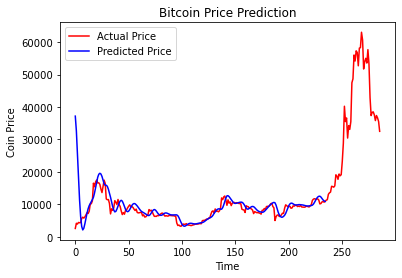

In [60]:
plt.plot(test_set, color = 'red', label = 'Actual Price')
plt.plot(predicted_coin_price, color = 'blue', label = 'Predicted Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Coin Price')
plt.legend()

In [75]:
# # Evaluate the model using the test data
# model_loss, model_accuracy = regressor.evaluate(X_test,y_train,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

ValueError: Data cardinality is ambiguous:
  x sizes: 235
  y sizes: 1061
Make sure all arrays contain the same number of samples.

In [72]:
# # Calculating the confusion matrix
# cm = confusion_matrix(X_test, predicted_coin_price)
# cm_df = pd.DataFrame(
#     cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
# )

# # Calculating the accuracy score
# acc_score = accuracy_score(X_test, predicted_coin_price)

ValueError: Classification metrics can't handle a mix of unknown and continuous targets

# Fitting the Decision Tree Model

In [66]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = std_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

ValueError: Found array with dim 3. StandardScaler expected <= 2.

In [63]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [64]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

NameError: name 'X_train_scaled' is not defined

In [62]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)
predictions

NameError: name 'X_test_scaled' is not defined